# Graph Coarsening

Please use python version <=3.12 because "cplex" library is not compatible with higher versions

In [ ]:
# Importing required packages from Src
%pip install -e ../Src --q

Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: Legacy editable install of QuantumLogistics==0.1.0 from file:///C:/Users/USER/Documents/GitHub/Quantum-Vehicle-Routing-Problems/Src (setup.py develop) is deprecated. pip 25.3 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457


In [ ]:
# Importing Libraries

import numpy as np
from time import time
import csv, os
import matplotlib.pyplot as plt

from QuantumLogistics import logisticsGraph, Route, StandardRouteSolver, ILPPulpEncoder, GurobiSolver, CBCSolver, DeltaCoarseningEngine, CompositeRouteSolver
from QuantumLogistics.LogisticsRoute.VrpRepGraph import vrpRepGraph

In [ ]:
# Loading the data

project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_dir = os.path.join(project_root, "Data", "Global_Datasets", "Christofides")

cmt_file = 'CMT01.xml'
file_path = os.path.join(data_dir, cmt_file)

print(f"[i] Loading graph file {file_path}...")
logistics_network = vrpRepGraph(file_path)
logistics_network.generate_graph()

print("[i] Graph loaded successfully!")

[i] Loading graph file c:\Users\USER\Documents\GitHub\Quantum-Vehicle-Routing-Problems\Data\Global_Datasets\Christofides\CMT01.xml...
[i] Graph loaded successfully!


In [ ]:
# Graph & Config

print(f'[[i] Setting graph configurations for {cmt_file}...')
number_of_nodes = logistics_network.n
truck_capacity = max(logistics_network.nodeCapacities)
depot_node = logistics_network.nodelist.vehicle['arrival_node']

print(f'[i] Number of nodes: {number_of_nodes}')
print(f'[i] Truck Capacity: {truck_capacity}')
print(f'[i] Depot Node: {depot_node}')

# Define the route configuration
number_trucks = 5 # From CMTDetails dictionary for CMT01
route_config = {'vehicles': number_trucks, 'depot': depot_node, 'truckCapacity': truck_capacity}

# Define the coarsening configuration
coarsening_rate = 0.7 # Let's try a rate of 0.7
coarsen_config = {'coarsenRate': coarsening_rate, 'radiusCoefficient': 0.2}
coarsening_engine = DeltaCoarseningEngine(**coarsen_config)

# Create the Route object
route = Route(logistics_network, coarseningEngine=coarsening_engine, **route_config)
route.coarsen = (coarsening_rate < 1.0)

[[i] Setting graph configurations for CMT01.xml...
[i] Number of nodes: 51
[i] Truck Capacity: 160.0
[i] Depot Node: 0


In [5]:
# Solving

# Define the solver we want to use (ILP with CBC backend)
encoder = ILPPulpEncoder()
solver_alg = CBCSolver()
solver = StandardRouteSolver(encoder, solver_alg)

solver_config = {"timeLimit": 300} # Time limit in seconds

print("[i] Solving the route...")
solved_route, solve_time, cost = solver.solve(route, config=solver_config)

print(f"[i] Solved in {solve_time:.2f} seconds with a total cost of {cost:.2f}")

[i] Solving the route...
Coarsening Graph now
Final coarse graph has 35 nodes
Starting problem encoding
"Status:", Optimal
The Objective function Value is: 934.615
[i] Solved in 299.47 seconds with a total cost of 1014.44


[i] Visualizing the solution...


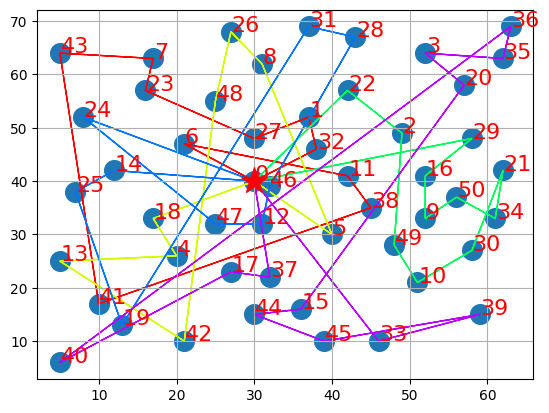

In [ ]:
# Visualizating

print("[i] Visualizing the solution...")
# Set the plot to be displayed inline in the notebook
%matplotlib inline
route.visualiseSolution(solved_route)